<a href="https://colab.research.google.com/github/mjsully/travel-spends-analysis/blob/main/Travel_spending_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime

### Create some helper methods

In [2]:
def random_colour_generator():
    r = random.randint(0, 255)/255
    g = random.randint(0, 255)/255
    b = random.randint(0, 255)/255
    return (r, g, b)

def date_midpoint(start, end):
  return start + (end - start) / 2

### Load data into pandas dataframe

In [3]:
data_path = 'drive/MyDrive/travelspend_export_26-06-2024.csv'
df = pd.read_csv(data_path)

### Create truncated dataframes

In [4]:
reduced_df = df[
    ['amountInHomeCurrency', 'country', 'category', 'datePaid']
  ].astype(
      {'amountInHomeCurrency': 'float64'}
  )
reduced_df['datePaid'] = pd.to_datetime(df['datePaid'], format='%d/%m/%Y')

# Create df grouped by category
sum_by_category = reduced_df.drop(
    ['datePaid'], axis=1
  ).groupby(
    by='category'
  ).sum().reset_index().sort_values(
    by='amountInHomeCurrency'
  )

# Create df grouped by country
sum_by_country = reduced_df.drop(
    ['datePaid'], axis=1
  ).groupby(
    by='country'
  ).sum().reset_index().sort_values(
    by='amountInHomeCurrency'
  )

# Create df grouped by date
sum_by_date = reduced_df.drop(
    ['category'], axis=1
  ).groupby(
    by=['datePaid', 'country']
  ).sum().reset_index().sort_values(
    by='datePaid'
  )

### Calculate some useful statistics

In [51]:
trip_total_spend = round(reduced_df['amountInHomeCurrency'].sum())
trip_start_date = sum_by_date['datePaid'].min()
trip_end_date = sum_by_date['datePaid'].max()
trip_total_days = (trip_end_date - trip_start_date).days
trip_average_daily_spend = round(trip_total_spend/trip_total_days)
trip_minimum_daily_spend = sum_by_date.amountInHomeCurrency.min()
trip_maximum_daily_spend = sum_by_date.amountInHomeCurrency.max()

print(f"Total spend: £{trip_total_spend}")
print(f"Trip start date: {trip_start_date.date()}")
print(f"Trip end date: {trip_end_date.date()}")
print(f"Trip length: {trip_total_days} days")
print(f"Average spend per day: £{trip_average_daily_spend}/day")
print(f"Minimum spend per day: £{trip_minimum_daily_spend}")
print(f"Average spend per day: £{trip_maximum_daily_spend}")

Total spend: £15502
Trip start date: 2023-12-05
Trip end date: 2024-05-10
Trip length: 157 days
Average spend per day: £99/day
Minimum spend per day: £0.0
Average spend per day: £673.99


### Plot categorical spend, by both category and country

<ipython-input-20-d05b32942e20>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sum_by_category.category, rotation=45);
<ipython-input-20-d05b32942e20>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sum_by_country.country, rotation=60);


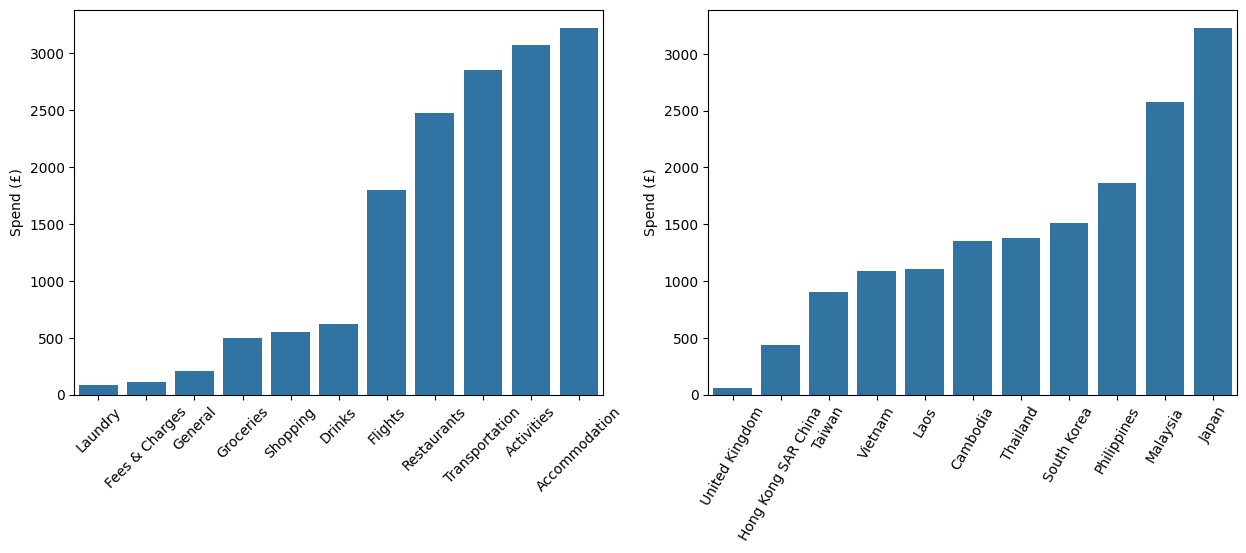

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))

sns.barplot(
    data = sum_by_category,
    x='category',
    y='amountInHomeCurrency',
    ax=ax1
);

ax1.set_xlabel('');
ax1.set_xticklabels(sum_by_category.category, rotation=45);
ax1.set_ylabel('Spend (£)');

sns.barplot(
    data = sum_by_country,
    x='country',
    y='amountInHomeCurrency',
    ax=ax2
);

ax2.set_xlabel('');
ax2.set_xticklabels(sum_by_country.country, rotation=60);
ax2.set_ylabel('Spend (£)');

### Dig deeper into the categorical data using violin plot

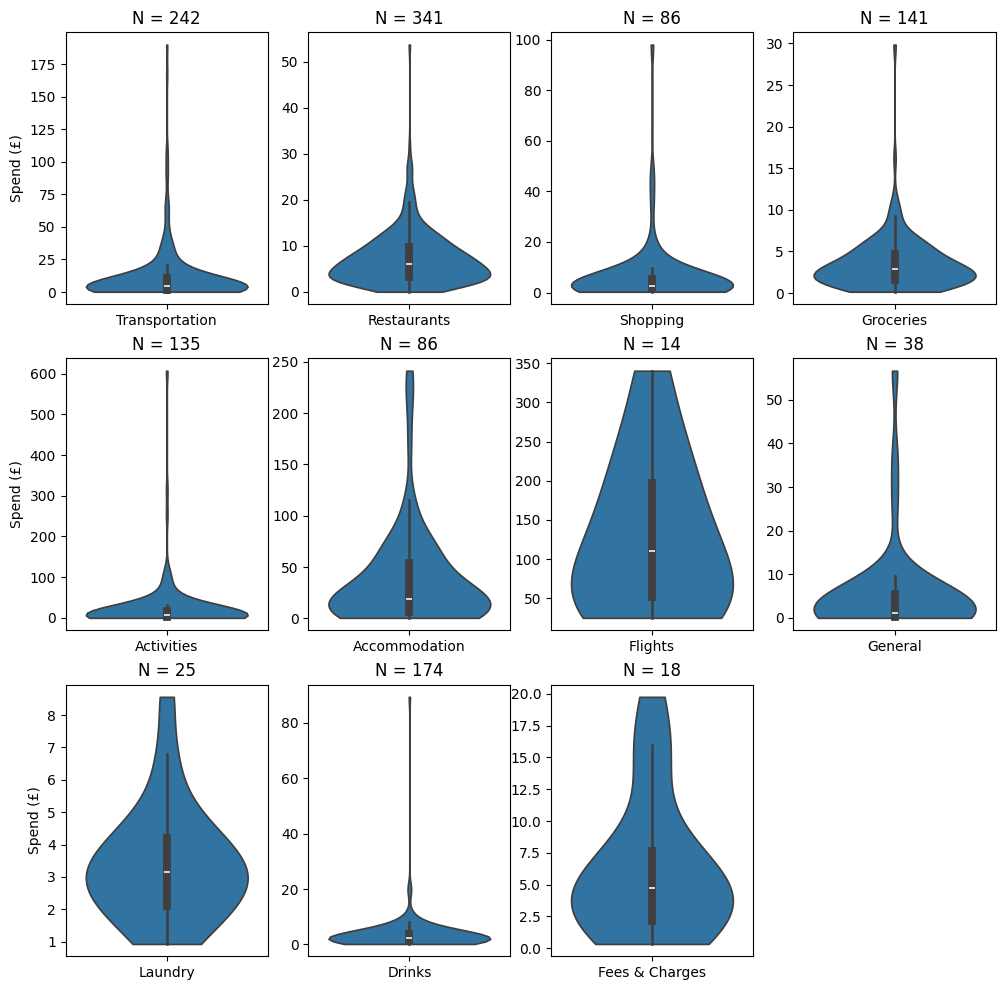

In [9]:
fig = plt.figure(figsize=(12, 12))

columns = 4
rows = np.ceil(reduced_df.category.unique().size/columns).astype('int32')

for index, category in enumerate(reduced_df.category.unique()):

  ax = fig.add_subplot(rows, columns, index + 1)

  n_samples = reduced_df[reduced_df['category'] == category].amountInHomeCurrency.size

  sns.violinplot(
    data=reduced_df[reduced_df['category'] == category],
    x="category",
    y="amountInHomeCurrency",
    cut=0,
    ax=ax
  )

  ax.set_title(f"N = {n_samples}")
  ax.set_xlabel('')
  if (index % columns == 0):
    ax.set_ylabel('Spend (£)')
  else:
    ax.set_ylabel('')

### Plot the spend per day, with the country plotted as a background

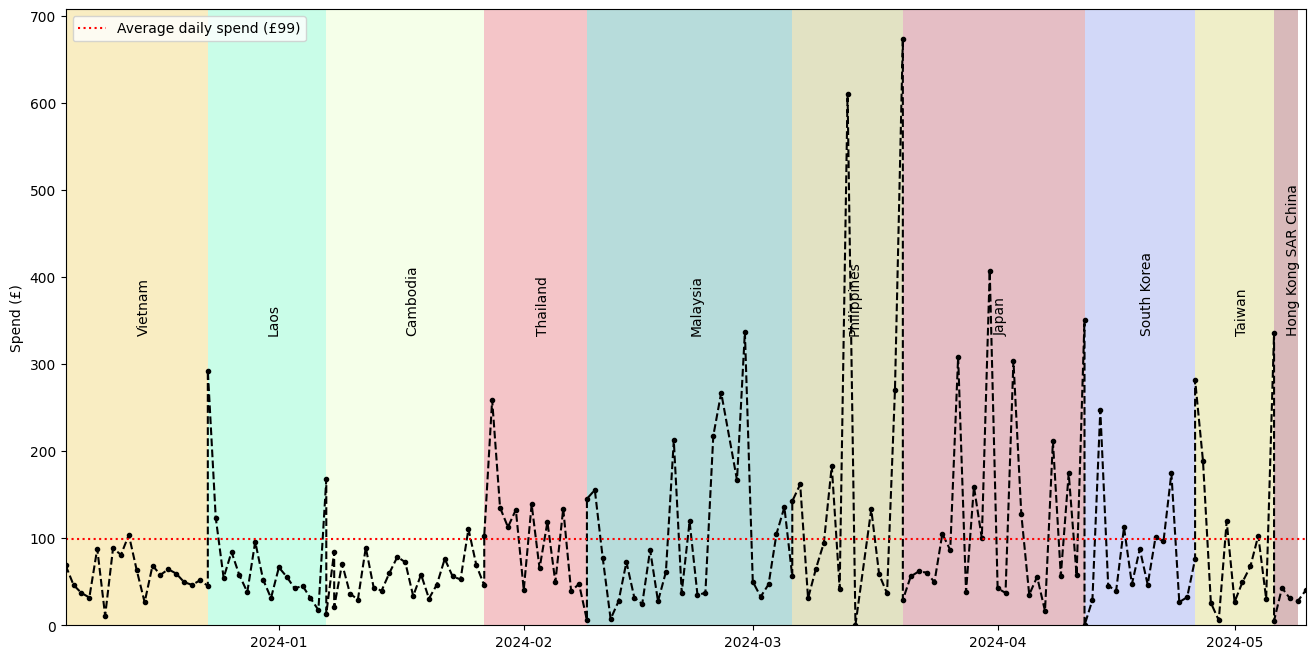

In [79]:
fig, ax = plt.subplots(figsize=(16,8))

exclude_countries = ['United Kingdom']
for country in sum_by_date.country.unique():
  if country in exclude_countries:
    continue
  start_date = sum_by_date[sum_by_date['country'] == country]['datePaid'].min()
  end_date = sum_by_date[sum_by_date['country'] == country]['datePaid'].max()
  plt.axvspan(
      start_date,
      end_date,
      facecolor=random_colour_generator(),
      alpha=0.3,
    );
  plt.text(
      date_midpoint(start_date, end_date),
      0.5*trip_maximum_daily_spend,
      country,
      rotation=90
    );

plt.plot(
  sum_by_date.datePaid,
  sum_by_date.amountInHomeCurrency,
  '.--',
  color='black'
);

plt.plot(
  [trip_start_date, trip_end_date],
  [trip_average_daily_spend, trip_average_daily_spend],
  linestyle='dotted',
  color='red',
  label=f'Average daily spend (£{trip_average_daily_spend})'
);

plt.legend(loc='best')
plt.xlim(trip_start_date, trip_end_date);
plt.ylim(0);
plt.ylabel('Spend (£)');

### Plot the cumulative spend, with the country plotted as a background

Text(0, 0.5, 'Spend (£)')

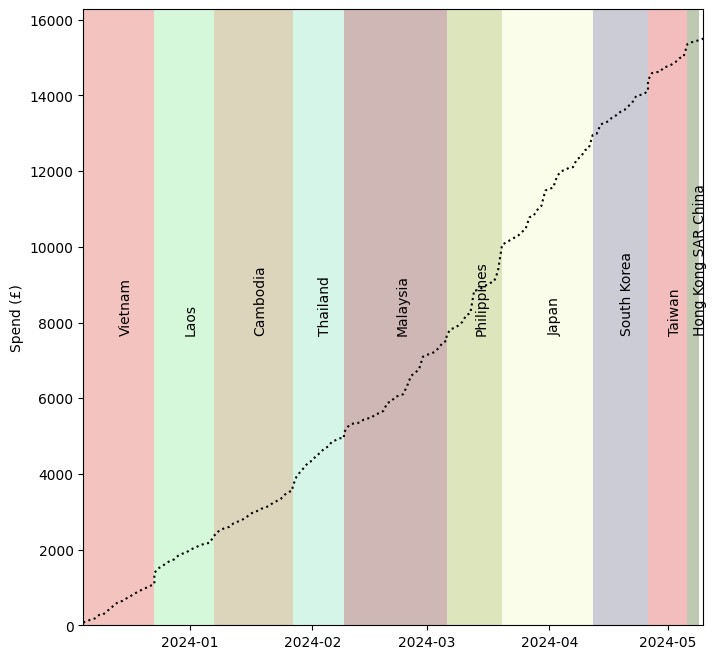

In [78]:
fig, ax = plt.subplots(figsize=(8,8))

exclude_countries = ['United Kingdom']
for country in sum_by_date.country.unique():
  if country in exclude_countries:
    continue
  start_date = sum_by_date[sum_by_date['country'] == country]['datePaid'].min()
  end_date = sum_by_date[sum_by_date['country'] == country]['datePaid'].max()
  plt.axvspan(
      start_date,
      end_date,
      facecolor=random_colour_generator(),
      alpha=0.3,
      label=country
    )
  plt.text(
      date_midpoint(start_date, end_date),
      0.5*trip_total_spend,
      country,
      rotation=90
    )

plt.plot(
  sum_by_date.datePaid,
  sum_by_date.amountInHomeCurrency.cumsum(),
  linestyle='dotted',
  color='black'
);

plt.xlim(trip_start_date, trip_end_date);
plt.ylim(0, 1.05*trip_total_spend);
plt.ylabel('Spend (£)');

### Work in progress plots...

<ipython-input-7-ebc6e9cb45f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='category', ylabel='amountInHomeCurrency'>

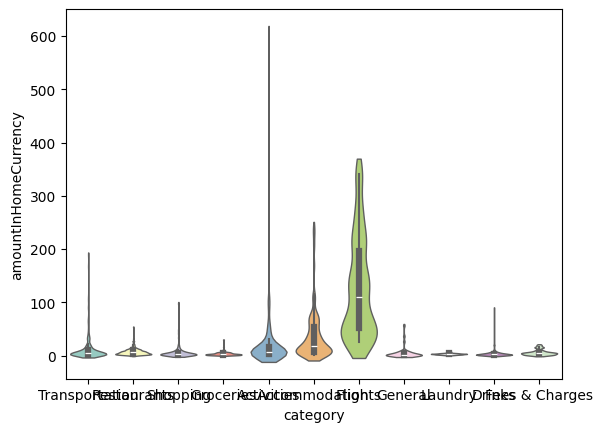

In [7]:
fig, ax = plt.subplots()

sns.violinplot(
    data=reduced_df,
    x='category',
    y='amountInHomeCurrency',
    bw_adjust=.5,
    cut=1,
    linewidth=1,
    palette="Set3"
  )

<ipython-input-8-c283c85b0058>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-8-c283c85b0058>:1: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


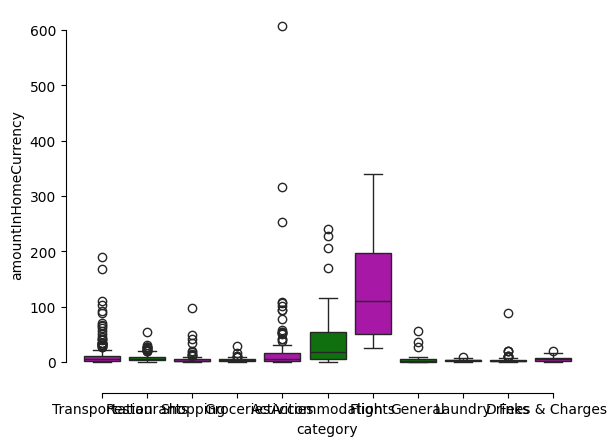

In [8]:
sns.boxplot(
    data=reduced_df,
    x="category",
    y="amountInHomeCurrency",
    palette=["m", "g"]
  )
sns.despine(offset=10, trim=True)

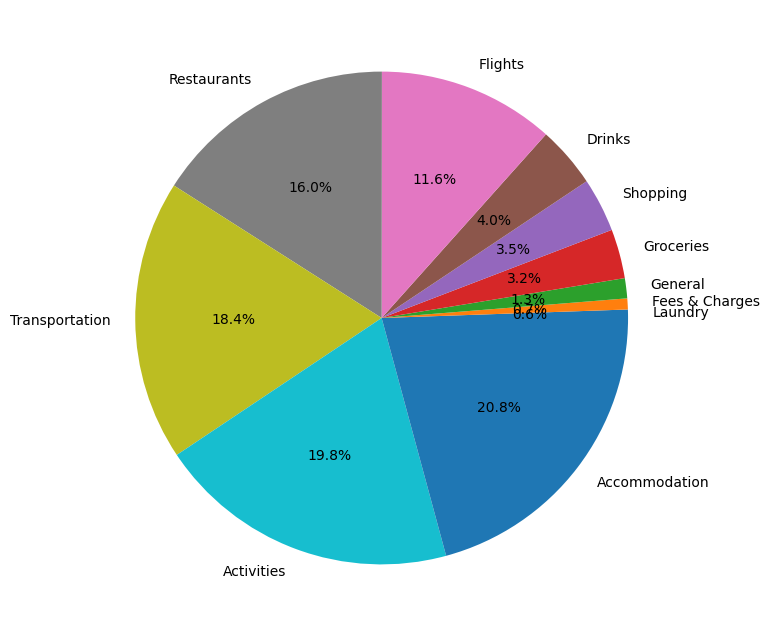

In [6]:
fig = plt.figure(figsize=(8, 8))

plt.pie(
    sum_by_category.amountInHomeCurrency,
    labels=sum_by_category.category,
    autopct='%1.1f%%'
);